In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display as show

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

In [ ]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

BANCO DE DADOS

---



In [ ]:
df = pd.read_csv('processado_Dalmas.csv', sep = ';',  encoding='ISO-8859-1')

In [ ]:
df.shape
print(f"Total de registros: {df.shape[0]}")
print(f"Total de variáveis base original: {df.shape[1]}")

Total de registros: 284977
Total de variáveis base original: 7


In [ ]:
df['criado_em'] = pd.to_datetime(df['criado_em'], utc=True)

In [ ]:
df['mes'] = df['criado_em'].dt.to_period('M')  # Mês
df['dia'] = df['criado_em'].dt.day               # Dia
df['hora'] = df['criado_em'].dt.hour             # Hora
df['minuto'] = df['criado_em'].dt.minute         # Minuto

#VISUALIZAÇÃO DAS VÁRIAVEIS AO LONGO DO TEMPO

---



##ANÁLISE POR MÊS , DIA, HORA E MINUTO  ( tempo_desde_ultimo_acionamento )

---



In [ ]:
#calculo das estatisticas por tempo desde o ultimo acionamento
stats_mensal = df.groupby('mes')['tempo_desde_ultimo_acionamento'].describe().reset_index()
stats_diaria = df.groupby('dia')['tempo_desde_ultimo_acionamento'].describe().reset_index()
stats_hora = df.groupby('hora')['tempo_desde_ultimo_acionamento'].describe().reset_index()
stats_minuto = df.groupby('minuto')['tempo_desde_ultimo_acionamento'].describe().reset_index()

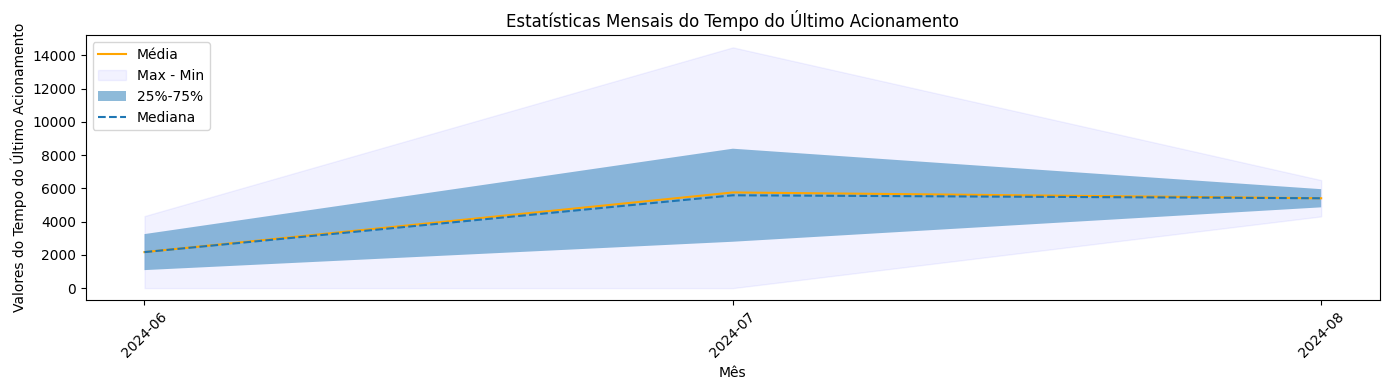

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(stats_mensal['mes'].astype(str), stats_mensal['mean'], label='Média Mensal', color='orange')
plt.fill_between(stats_mensal['mes'].astype(str), stats_mensal['min'], stats_mensal['max'], alpha=0.05, color='blue')
plt.fill_between(stats_mensal['mes'].astype(str), stats_mensal['25%'], stats_mensal['75%'], alpha=0.5)
plt.plot(stats_mensal['mes'].astype(str), stats_mensal['50%'], linestyle='--', label='Mediana Mensal')

plt.title('Estatísticas Mensais do Tempo do Último Acionamento')
plt.ylabel('Valores do Tempo do Último Acionamento')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.legend(['Média','Max - Min','25%-75%', 'Mediana'], loc='upper left')
plt.tight_layout()
plt.show()

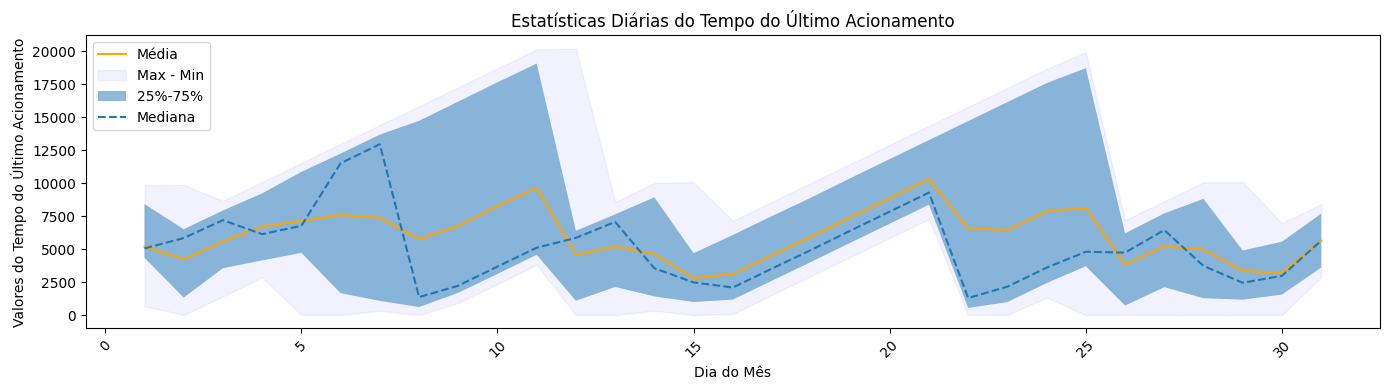

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(stats_diaria['dia'], stats_diaria['mean'], label='Média Diária', color='orange')
plt.fill_between(stats_diaria['dia'], stats_diaria['min'], stats_diaria['max'], alpha=0.05, color='blue')
plt.fill_between(stats_diaria['dia'], stats_diaria['25%'], stats_diaria['75%'], alpha=0.5)
plt.plot(stats_diaria['dia'], stats_diaria['50%'], linestyle='--', label='Mediana Diária')

plt.title('Estatísticas Diárias do Tempo do Último Acionamento')
plt.ylabel('Valores do Tempo do Último Acionamento')
plt.xlabel('Dia do Mês')
plt.xticks(rotation=45)
plt.legend(['Média','Max - Min','25%-75%', 'Mediana'], loc='upper left')
plt.tight_layout()
plt.show()

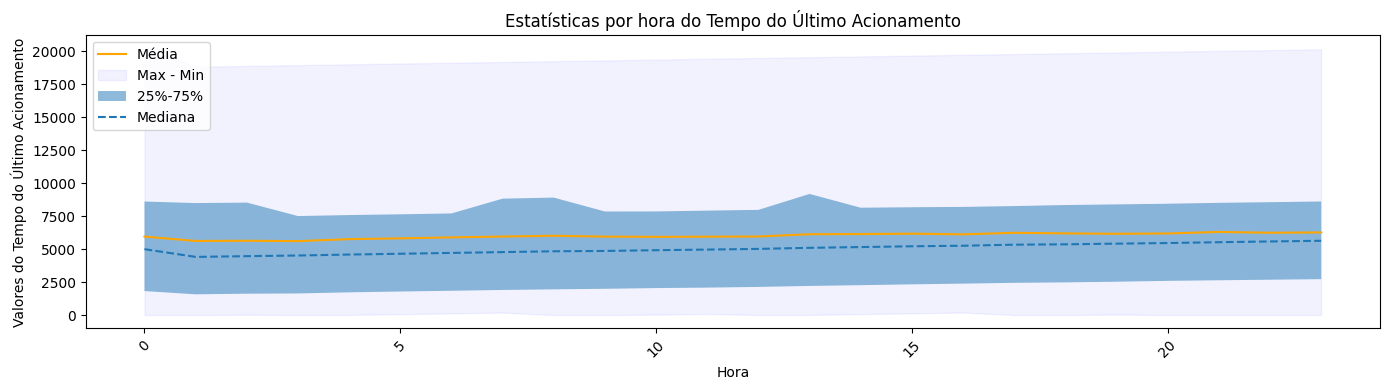

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(stats_hora['hora'], stats_hora['mean'], label='Média por hora', color='orange')
plt.fill_between(stats_hora['hora'], stats_hora['min'], stats_hora['max'], alpha=0.05, color='blue')
plt.fill_between(stats_hora['hora'], stats_hora['25%'], stats_hora['75%'], alpha=0.5)
plt.plot(stats_hora['hora'], stats_hora['50%'], linestyle='--', label='Mediana por hora')

plt.title('Estatísticas por hora do Tempo do Último Acionamento')
plt.ylabel('Valores do Tempo do Último Acionamento')
plt.xlabel('Hora')
plt.xticks(rotation=45)
plt.legend(['Média','Max - Min','25%-75%', 'Mediana'], loc='upper left')
plt.tight_layout()
plt.show()

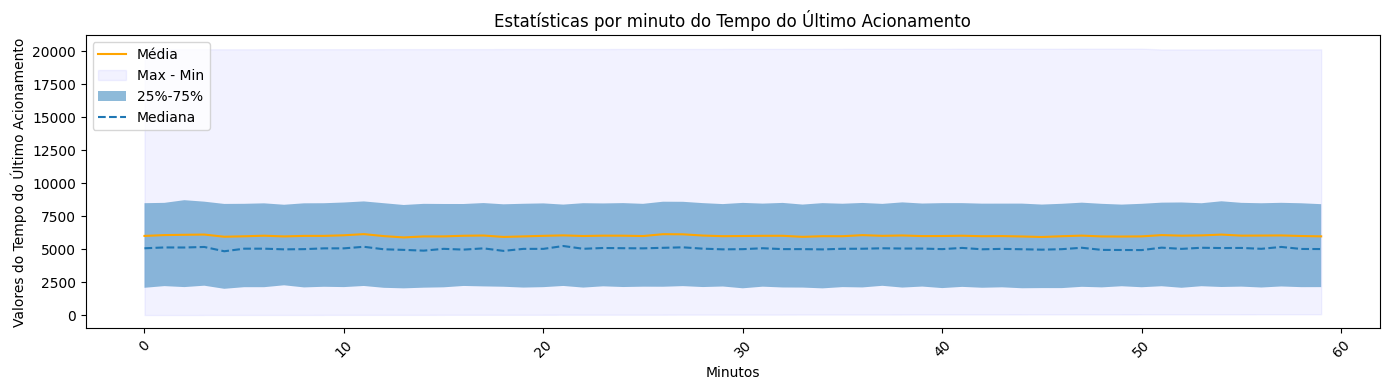

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(stats_minuto['minuto'], stats_minuto['mean'], label='Média por minuto', color='orange')
plt.fill_between(stats_minuto['minuto'], stats_minuto['minuto'], stats_minuto['max'], alpha=0.05, color='blue')
plt.fill_between(stats_minuto['minuto'], stats_minuto['25%'], stats_minuto['75%'], alpha=0.5)
plt.plot(stats_minuto['minuto'], stats_minuto['50%'], linestyle='--', label='Mediana por minuto')

plt.title('Estatísticas por minuto do Tempo do Último Acionamento')
plt.ylabel('Valores do Tempo do Último Acionamento')
plt.xlabel('Minutos')
plt.xticks(rotation=45)
plt.legend(['Média','Max - Min','25%-75%', 'Mediana'], loc='upper left')
plt.tight_layout()
plt.show()

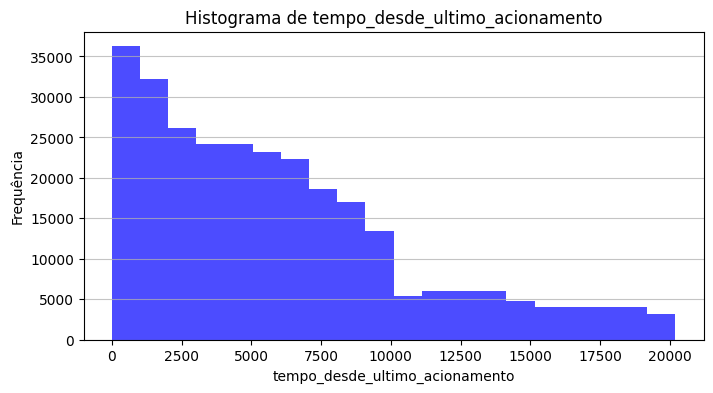

In [ ]:
variavel1 = 'tempo_desde_ultimo_acionamento'


plt.figure(figsize=(8, 4))
plt.hist(df[variavel1], bins=20, color='blue', alpha=0.7)
plt.title(f'Histograma de {variavel1}')
plt.xlabel(variavel1)
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
variavel = 'tempo_desde_ultimo_acionamento'
tit = 'Distribuição do Tempo de Acionamento'
ylab = 'Frequência Normalizada'

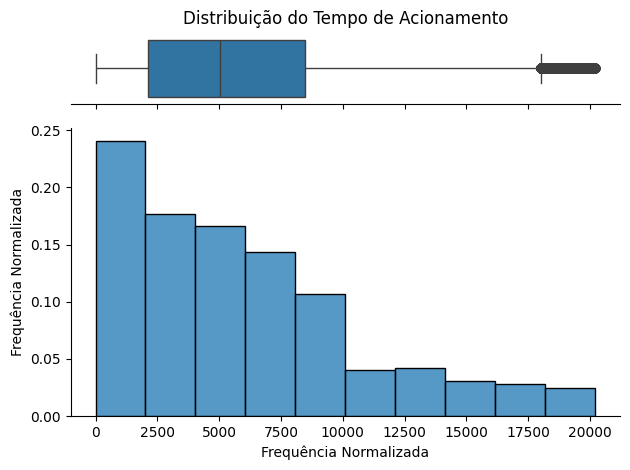

In [ ]:
x = df[variavel1]
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)})

# Boxplot
sns.boxplot(x=x, ax=ax_box)
ax_box.set(yticks=[])

# Histograma
sns.histplot(x=x, ax=ax_hist, bins=10, kde=False, stat='probability') #frequencia normalizada


ax_box.set(title=tit)
ax_box.set(xlabel='')
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.xlabel(ylab)
plt.ylabel('Frequência Normalizada')
plt.tight_layout()
plt.show()

In [ ]:
Variavel = 'tempo_desde_ultimo_acionamento' #defino a variavel que quero
ylab = 'Tempo desde o Último Acionamento'

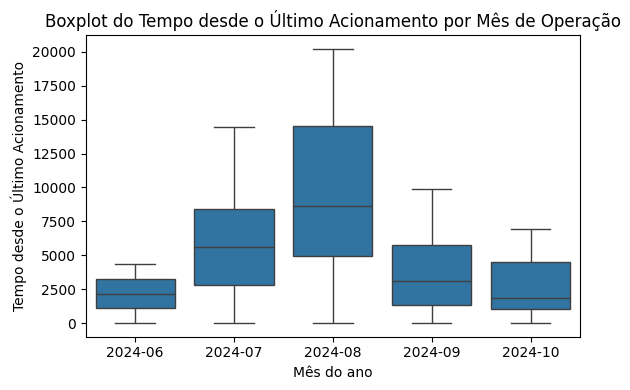

In [ ]:
# boxplot por mes
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x='mes', y=Variavel, data=df, showfliers=True)
ax.set(title='Boxplot do Tempo desde o Último Acionamento por Mês de Operação')
plt.ylabel(ylab)
plt.xlabel('Mês do ano')
plt.tight_layout()
plt.show()

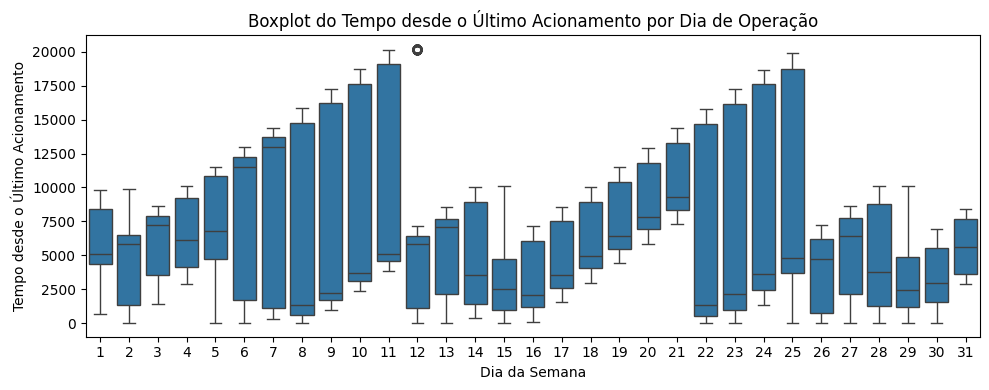

In [ ]:
# boxplot por dia levando em consideração todos os meses
plt.figure(figsize=(10, 4))
ax = sns.boxplot(x='dia', y=Variavel, data=df, showfliers=True)
ax.set(title='Boxplot do Tempo desde o Último Acionamento por Dia de Operação')
plt.ylabel(ylab)
plt.xlabel('Dia da Semana')
plt.tight_layout()
plt.show()

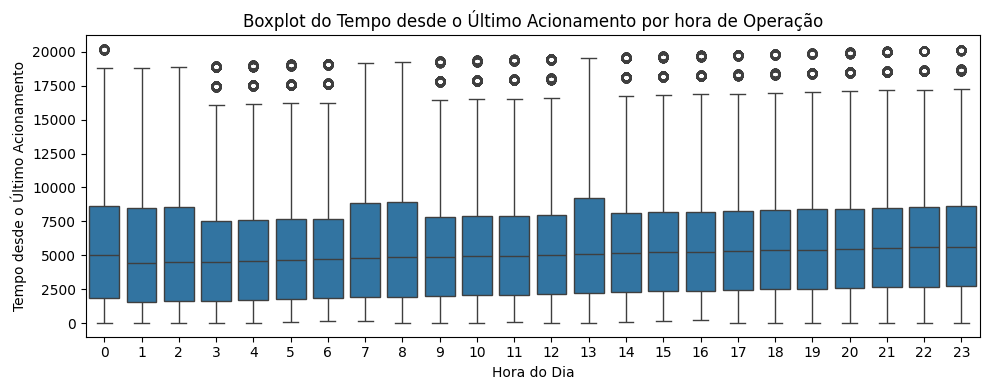

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.boxplot(x='hora', y=Variavel, data=df, showfliers=True)
ax.set(title='Boxplot do Tempo desde o Último Acionamento por hora de Operação')
plt.ylabel(ylab)
plt.xlabel('Hora do Dia')
plt.tight_layout()
plt.show()

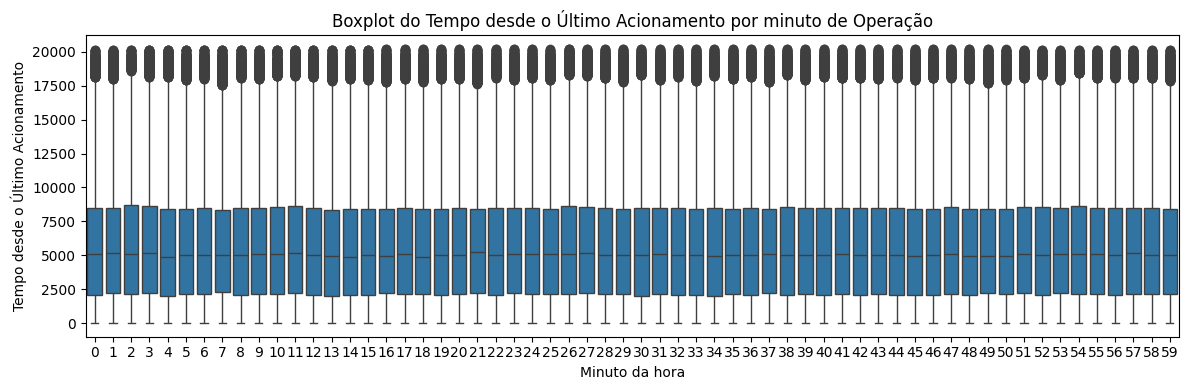

In [ ]:
plt.figure(figsize=(12, 4))
ax = sns.boxplot(x='minuto', y=Variavel, data=df, showfliers=True)
ax.set(title='Boxplot do Tempo desde o Último Acionamento por minuto de Operação')
plt.ylabel(ylab)
plt.xlabel('Minuto da hora')
plt.tight_layout()
plt.show()

##ANÁLISE MÊS, DIA , HORA E MINUTO  ( Valor Acumulador)

In [ ]:
#calculando as estatisticas dos acionamentos acumulados
stats_mensal2 = df.groupby('mes')['valor_acumulador'].describe().reset_index()
stats_diaria2 = df.groupby('dia')['valor_acumulador'].describe().reset_index()
stats_hora2 = df.groupby('hora')['valor_acumulador'].describe().reset_index()
stats_minuto2 = df.groupby('minuto')['valor_acumulador'].describe().reset_index()

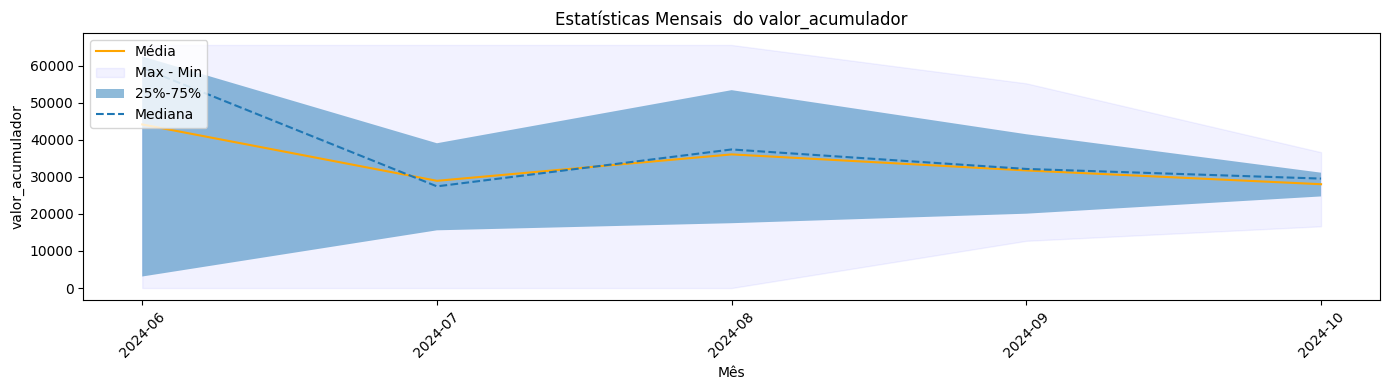

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(stats_mensal2['mes'].astype(str), stats_mensal2['mean'], label='Média Mensal', color='orange')
plt.fill_between(stats_mensal2['mes'].astype(str), stats_mensal2['min'], stats_mensal2['max'], alpha=0.05, color='blue')
plt.fill_between(stats_mensal2['mes'].astype(str), stats_mensal2['25%'], stats_mensal2['75%'], alpha=0.5)
plt.plot(stats_mensal2['mes'].astype(str), stats_mensal2['50%'], linestyle='--', label='Mediana Mensal')

plt.title('Estatísticas Mensais  do valor_acumulador')
plt.ylabel('valor_acumulador')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.legend(['Média','Max - Min','25%-75%', 'Mediana'], loc='upper left')
plt.tight_layout()
plt.show()

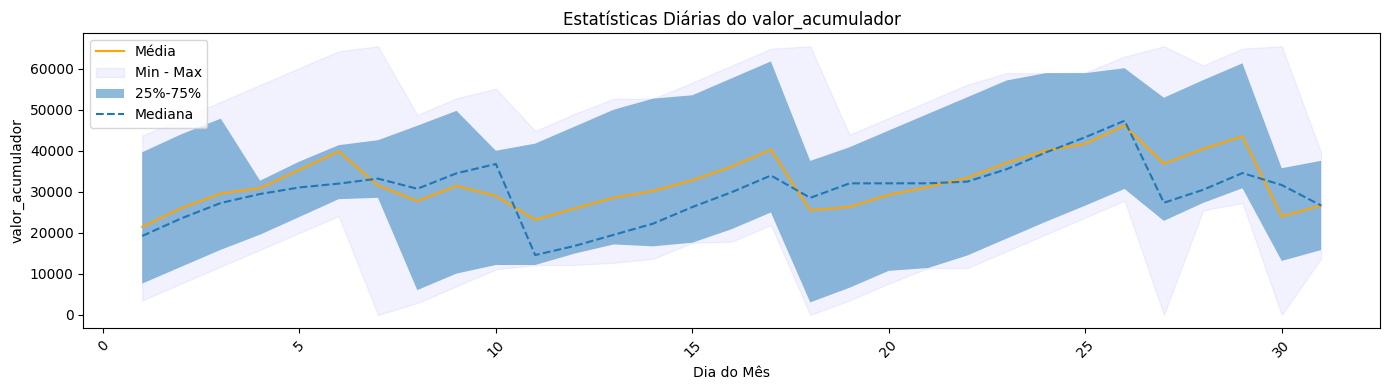

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(stats_diaria2['dia'], stats_diaria2['mean'], label='Média Diária', color='orange')
plt.fill_between(stats_diaria2['dia'], stats_diaria2['min'], stats_diaria2['max'], alpha=0.05, color='blue')
plt.fill_between(stats_diaria2['dia'], stats_diaria2['25%'], stats_diaria2['75%'], alpha=0.5)
plt.plot(stats_diaria2['dia'], stats_diaria2['50%'], linestyle='--', label='Mediana Diária')

plt.title('Estatísticas Diárias do valor_acumulador')
plt.ylabel('valor_acumulador')
plt.xlabel('Dia do Mês')
plt.xticks(rotation=45)
plt.legend(['Média','Min - Max','25%-75%', 'Mediana'], loc='upper left')
plt.tight_layout()
plt.show()

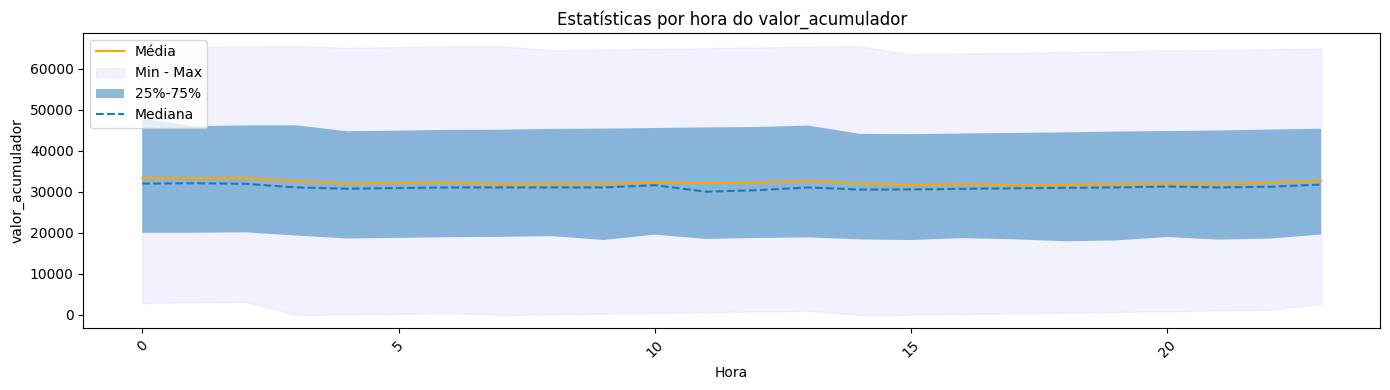

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(stats_hora2['hora'], stats_hora2['mean'], label='Média por hora', color='orange')
plt.fill_between(stats_hora2['hora'], stats_hora2['min'], stats_hora2['max'], alpha=0.05, color='blue')
plt.fill_between(stats_hora2['hora'], stats_hora2['25%'], stats_hora2['75%'], alpha=0.5)
plt.plot(stats_hora2['hora'], stats_hora2['50%'], linestyle='--', label='Mediana por hora')

plt.title('Estatísticas por hora do valor_acumulador')
plt.ylabel('valor_acumulador')
plt.xlabel('Hora')
plt.xticks(rotation=45)
plt.legend(['Média','Min - Max','25%-75%', 'Mediana'], loc='upper left')
plt.tight_layout()
plt.show()

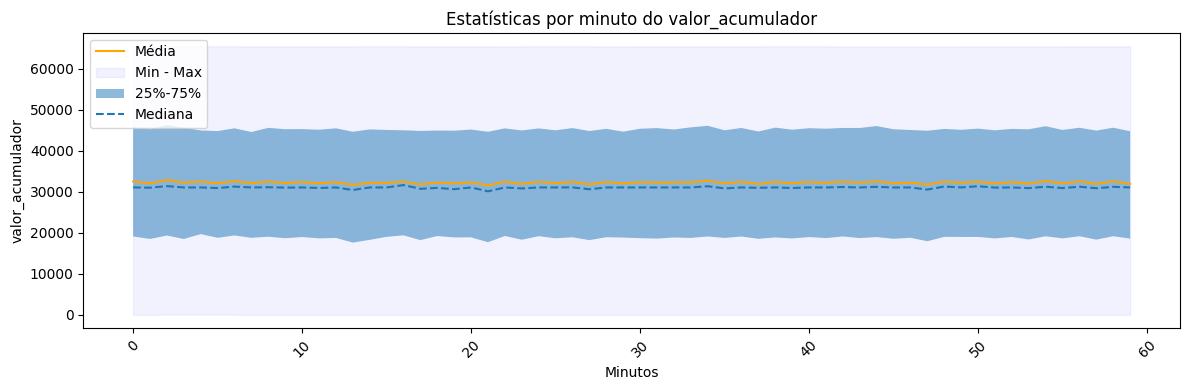

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(stats_minuto2['minuto'], stats_minuto2['mean'], label='Média por minuto', color='orange')
plt.fill_between(stats_minuto2['minuto'], stats_minuto2['min'], stats_minuto2['max'], alpha=0.05, color='blue')
plt.fill_between(stats_minuto2['minuto'], stats_minuto2['25%'], stats_minuto2['75%'], alpha=0.5)
plt.plot(stats_minuto2['minuto'], stats_minuto2['50%'], linestyle='--', label='Mediana por minuto')

plt.title('Estatísticas por minuto do valor_acumulador')
plt.ylabel('valor_acumulador')
plt.xlabel('Minutos')
plt.xticks(rotation=45)
plt.legend(['Média','Min - Max','25%-75%', 'Mediana'], loc='upper left')
plt.tight_layout()
plt.show()

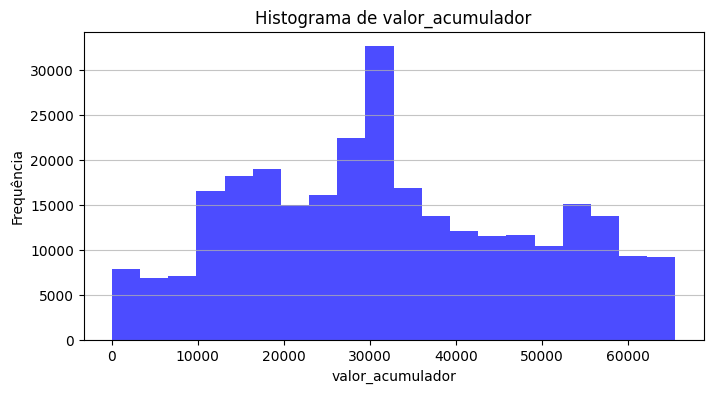

In [ ]:
variavel2 = 'valor_acumulador'


plt.figure(figsize=(8, 4))
plt.hist(df[variavel2], bins=20, color='blue', alpha=0.7)
plt.title(f'Histograma de {variavel2}')
plt.xlabel(variavel2)
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

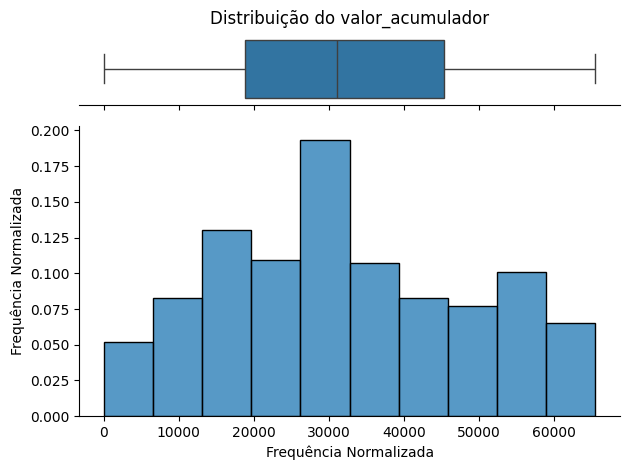

In [ ]:
variavel2 = 'valor_acumulador'
tit = 'Distribuição do valor_acumulador'
ylab = 'Frequência Normalizada'


x = df[variavel2]
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)})

# Boxplot
sns.boxplot(x=x, ax=ax_box)
ax_box.set(yticks=[])

# Histograma
sns.histplot(x=x, ax=ax_hist, bins=10, kde=False, stat='probability') #frequencia normalizada


ax_box.set(title=tit)
ax_box.set(xlabel='')
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.xlabel(ylab)
plt.ylabel('Frequência Normalizada')
plt.tight_layout()
plt.show()

In [ ]:
Variavel2 = 'valor_acumulador' #variavel
ylab = 'valor_acumulador'

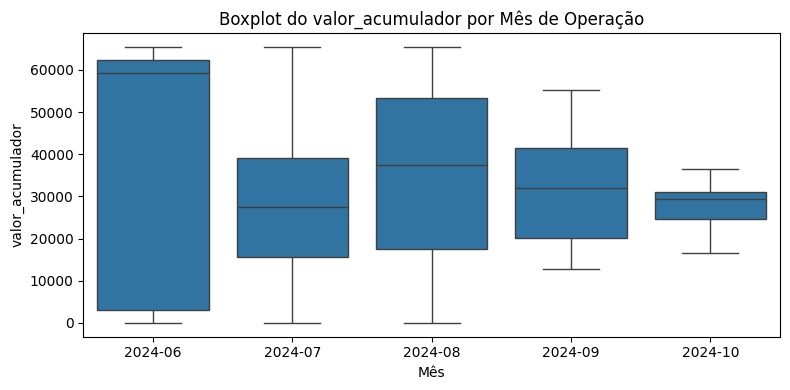

In [ ]:
# boxplot por dia levando em consideração todos os meses
plt.figure(figsize=(8, 4))
ax = sns.boxplot(x='mes', y=Variavel2, data=df, showfliers=True)
ax.set(title='Boxplot do valor_acumulador por Mês de Operação')
plt.ylabel(ylab)
plt.xlabel('Mês')
plt.tight_layout()
plt.show()

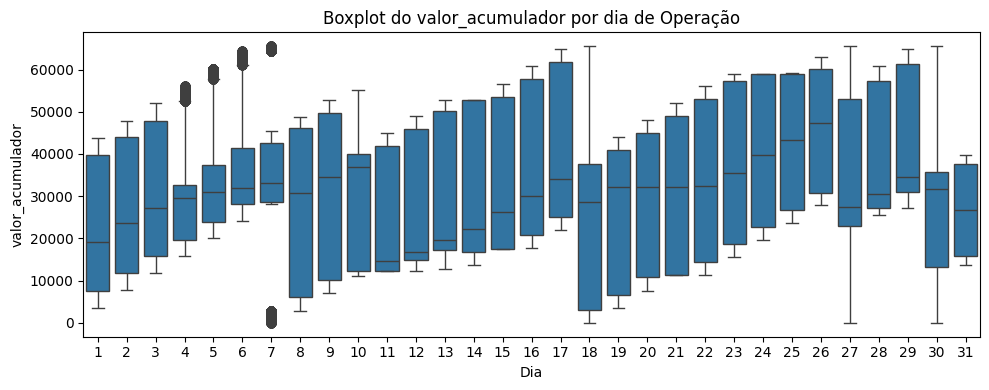

In [ ]:
# boxplot por mes
plt.figure(figsize=(10, 4))
ax = sns.boxplot(x='dia', y=Variavel2, data=df, showfliers=True)
ax.set(title='Boxplot do valor_acumulador por dia de Operação')
plt.ylabel(ylab)
plt.xlabel('Dia')
plt.tight_layout()
plt.show()

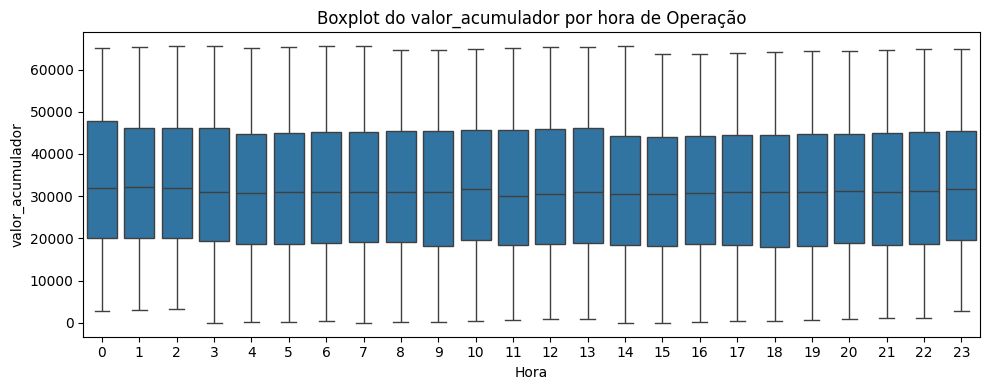

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.boxplot(x='hora', y=Variavel2, data=df, showfliers=True)
ax.set(title='Boxplot do valor_acumulador por hora de Operação')
plt.ylabel(ylab)
plt.xlabel('Hora')
plt.tight_layout()
plt.show()

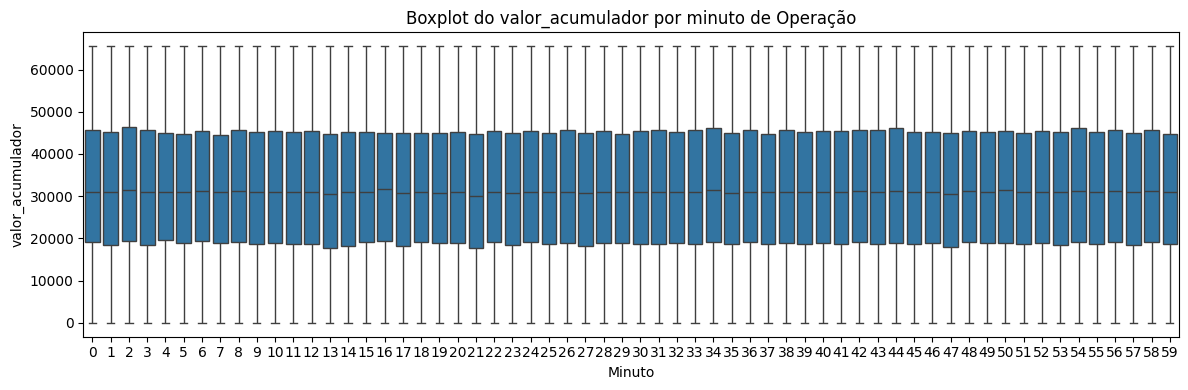

In [ ]:
plt.figure(figsize=(12, 4))
ax = sns.boxplot(x='minuto', y=Variavel2, data=df, showfliers=True)
ax.set(title='Boxplot do valor_acumulador por minuto de Operação')
plt.ylabel(ylab)
plt.xlabel('Minuto')
plt.tight_layout()
plt.show()

VALORES AUSENTES

---



In [ ]:
nulos = df.isna().sum()
percentuais_nulos = nulos / df.shape[0] * 100
Missings = pd.DataFrame({'Valores Nulos': nulos, 'Porcentagem de Nulos': percentuais_nulos})
show(Missings[Missings['Valores Nulos'] > 0])

Empty DataFrame
Columns: [Valores Nulos, Porcentagem de Nulos]
Index: []

## MEDIDAS DESCRITIVAS

---



MEDIDAS DESCRITIVAS FILTRADAS POR MÊS

---



In [ ]:
Mes_dia2 = df.groupby(['mes', 'dia'])['tempo_desde_ultimo_acionamento'].describe()
resultado = pd.DataFrame(Mes_dia2)


resultado.index.name = 'Mes e Dia'
resultado.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
variavel = 'tempo_desde_ultimo_acionamento'


print(f"Análise descritiva da variável: {variavel}")
resultado

Análise descritiva da variável: tempo_desde_ultimo_acionamento


count          mean          std           min           25%  \
mes     dia                                                                  
2024-06 27     33.0      7.850836     4.858591      0.000000      3.450862   
        28   2878.0    736.000662   415.785033     16.322479    375.940780   
        29   2878.0   2176.198469   415.846947   1456.372009   1815.893338   
        30   2878.0   3616.068481   415.779547   2896.358720   3256.019104   
2024-07 1    2878.0   5055.950244   415.734317   4336.438087   4695.891012   
        2    2660.0   6491.334565   433.132967   5776.379147   6108.662236   
        3    2878.0   7935.985276   415.821201   7216.438949   7575.886604   
        4    2878.0   9375.926511   415.744107   8656.381135   9016.149208   
        5    2873.0  10816.406729   416.164179  10096.292292  10455.548169   
        6    2878.0  12255.918554   415.765163  11536.313866  11895.964558   
        7    2878.0  13695.914804   415.769251  12976.213495  13335.955734   
        8    2743.0   1426.804433  3102.495764      0.000000    343.058628   
        9    2878.0   2087.286435   415.771858   1367.596117   1727.316328   
        10   2758.0   3543.195191   419.084089   2807.575214   3152.400687   
        11   2878.0   4967.943439   415.787185   4247.984954   4607.975743   
        12   2878.0   6407.918565   415.824677   5688.089314   6047.895055   
        13   2878.0   7847.775733   415.756404   7128.002248   7487.954092   
        14   2878.0   9287.765191   415.757993   8568.064328   8927.821499   
        15   2877.0   1158.230722  2090.629184      0.000000    359.680153   
        16   2878.0   2086.669430   415.759935   1366.971217   1726.699065   
        17   2878.0   3526.677589   415.775812   2806.949334   3166.772637   
        18   2878.0   4966.704383   415.798301   4247.177839   4606.706465   
        19   2878.0   6406.867257   415.553899   5687.775596   6048.115928   
        20   2878.0   7846.633545   415.733851   7126.985812   7486.624867   
        21   2878.0   9286.632262   415.749582   8566.959375   8926.654534   
        22   2878.0    755.429274   727.624530      0.000000    359.617395   
        23   2875.0   2153.372930   415.859552   1433.996026   1793.307681   
        24   2878.0   3593.502902   415.767929   2873.671722   3233.478024   
        25   2871.0   5032.907657   416.106473   4313.977010   4672.662508   
        26   2878.0   6473.490718   415.857847   5753.687025   6113.434039   
        27   2871.0   7914.685925   415.143967   7193.789377   7555.712729   
        28   2879.0   9353.396050   415.919075   8633.737956   8993.201571   
        29   2878.0    749.842275   688.822411      0.000000    359.707300   
        30   2878.0   2154.845570   415.754236   1435.035403   1794.732907   
        31   2878.0   3594.844190   415.797078   2875.036704   3234.711438   
2024-08 1    2878.0   5034.660095   415.740333   4315.085514   4674.699372   
        2    1493.0   6128.152886   215.716627   5755.081030   5941.354494   

                      50%           75%           max  
mes     dia                                            
2024-06 27       7.838588     11.918211     15.578572  
        28     735.869106   1096.004955   1455.888474  
        29    2175.904430   2535.826697   2895.680881  
        30    3616.036921   3976.033639   4335.689595  
2024-07 1     5055.906925   5415.949373   5775.377892  
        2     6441.401606   6883.191997   7215.472903  
        3     7935.932160   8295.903495   8655.681785  
        4     9375.901206   9735.835951  10095.513085  
        5    10817.017317  11176.276830  11535.480780  
        6    12255.915956  12615.850682  12975.517711  
        7    13695.879090  14055.807228  14415.521342  
        8      753.535732   1096.548986  14488.316159  
        9     2087.352147   2447.193953   2806.936735  
        10    3557.814671   3902.694904   4247.552653  
        11    4967.810131   5327.719163   5687.477572  
        12    6407.



---



In [ ]:
Mes_dia2 = df.groupby(['mes', 'dia'])['valor_acumulador'].describe()
resultado2 = pd.DataFrame(Mes_dia2)


resultado2.index.name = 'Mes e Dia'
resultado2.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
variavel2 = 'valor_acumulador'


print(f"Análise descritiva da variável: {variavel2}")
resultado2

Análise descritiva da variável: valor_acumulador


count          mean           std      min       25%      50%  \
mes     dia                                                                   
2024-06 27     33.0  56737.909091     14.036478  56715.0  56726.00  56738.0   
        28   2878.0  58809.484364   1181.504165  56763.0  57786.50  58812.5   
        29   2878.0  62915.662613   1187.228612  60858.0  61889.25  62916.5   
        30   2878.0  10478.789785  21847.193041      1.0   1032.25   2060.0   
2024-07 1    2878.0   5614.663655   1188.101915   3558.0   4587.25   5617.0   
        2    2660.0   9645.686466   1216.800050   7672.0   8622.75   9572.5   
        3    2878.0  13840.554204   1183.290412  11788.0  12816.25  13844.0   
        4    2878.0  17945.638290   1187.205916  15890.0  16917.25  17946.0   
        5    2873.0  22061.433345   1188.869864  20002.0  21031.00  22065.0   
        6    2878.0  26176.359972   1189.076159  24118.0  25147.25  26178.0   
        7    2878.0  28551.728631     52.426604  28235.0  28565.00  28565.0   
        8    2743.0  30410.444404   1218.190414  28565.0  29337.50  30515.0   
        9    2878.0  34552.153579   1192.872368  32487.0  33520.25  34552.0   
        10   2758.0  38730.257070   1201.504320  36618.0  37611.25  38774.5   
        11   2878.0  42817.352328   1195.004304  40749.0  41782.50  42818.5   
        12   2878.0  46954.669910   1194.834409  44887.0  45920.50  46954.5   
        13   2878.0  51072.784225   1163.824374  49026.0  50058.50  51092.5   
        14   2878.0  52757.000000      0.000000  52757.0  52757.00  52757.0   
        15   2877.0  54616.103233   1186.567315  52757.0  53574.00  54612.0   
        16   2878.0  58744.706046   1191.747336  56680.0  57713.50  58745.5   
        17   2878.0  62873.445796   1193.163169  60808.0  61840.50  62873.5   
        18   2878.0  10908.668867  22300.970667      1.0   1033.25   2066.0   
        19   2878.0   5599.176164   1190.647302   3536.0   4568.50   5599.5   
        20   2878.0   9707.653579   1168.216989   7661.0   8690.50   9723.5   
        21   2878.0  11437.000000      0.000000  11437.0  11437.00  11437.0   
        22   2878.0  13472.047255   1188.476830  11437.0  12443.50  13471.5   
        23   2875.0  17588.693565   1188.302789  15533.0  16560.50  17587.0   
        24   2878.0  21706.142808   1188.593615  19647.0  20678.50  21706.5   
        25   2871.0  25818.299896   1186.414909  23765.0  24790.00  25819.0   
        26   2878.0  29929.957262   1189.851704  27871.0  28900.25  29929.5   
        27   2871.0  24255.897597   2473.229890  21719.0  22746.50  23774.0   
        28   2879.0  26922.507815    563.495959  25516.0  26545.50  27316.0   
        29   2878.0  29359.034746   1187.522701  27316.0  28331.50  29358.5   
        30   2878.0  33474.248089   1187.774472  31418.0  32446.50  33474.0   
        31   2878.0  37593.158443   1188.312618  35533.0  36566.25  37594.5   
2024-08 1    2878.0  41705.040306   1187.372673  39650.0  40677.25  41706.5   
        2    2878.0  45815.308548   1187.272859  43761.0  44787.50  45814.5   
        3    2878.0  49926.337040   1186.691361  47872.0  48899.50  49926.5   
        4    1702.0  53779.543478   1251.929356  51985.0  52591.50  53663.5   
        5    2217.0  58491.226883   1121.129444  56095.0  57680.00  58622.0   
        6    2877.0  62260.455683   1187.236348  60206.0  61232.00  62262.0   
        7    2879.0  20309.372699  29018.405675      2.0   1029.50   2059.0   
        8    2878.0   4946.689020   1186.225963   2894.0   3919.75   4946.5   
        9    2878.0   9057.814454   1186.335313   7003.0   8031.25   9056.5   
        10   2878.0  12041.190757    282.328635  11112.0  12142.25  12180.0   
        11   2878.0  12180.000000      0.000000  12180.0  12180.00  12180.0   
        12   2878.0  14082.568798   1177.910676  12180.0  13057.25  14079.0   
        13   2878.0  18175.021890   1179.471757  16130.0  17155.25  18178.0   
        14   2878.0  22269.345031   1182.880221  20221.0  21246.

VISUALIZAÇÃO VARIÁVEIS BINARIAS POR MÊS

---



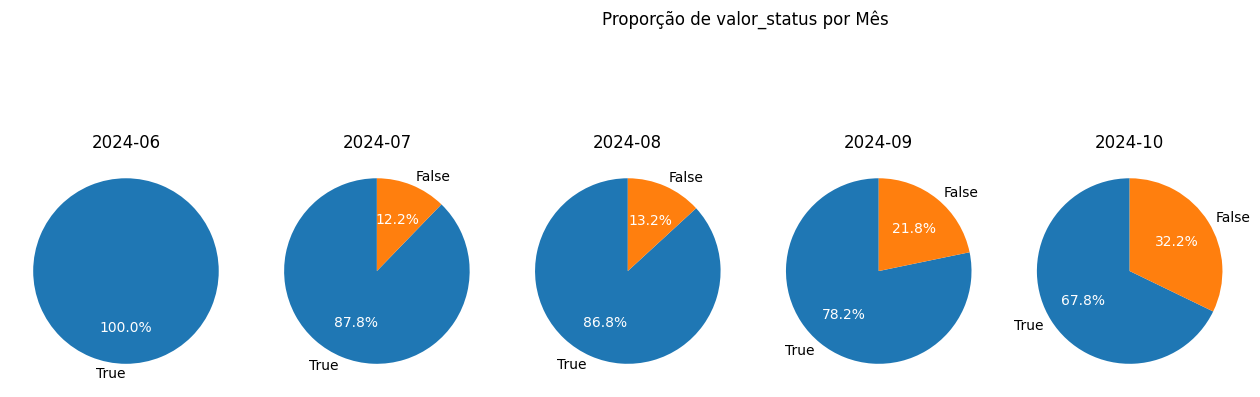

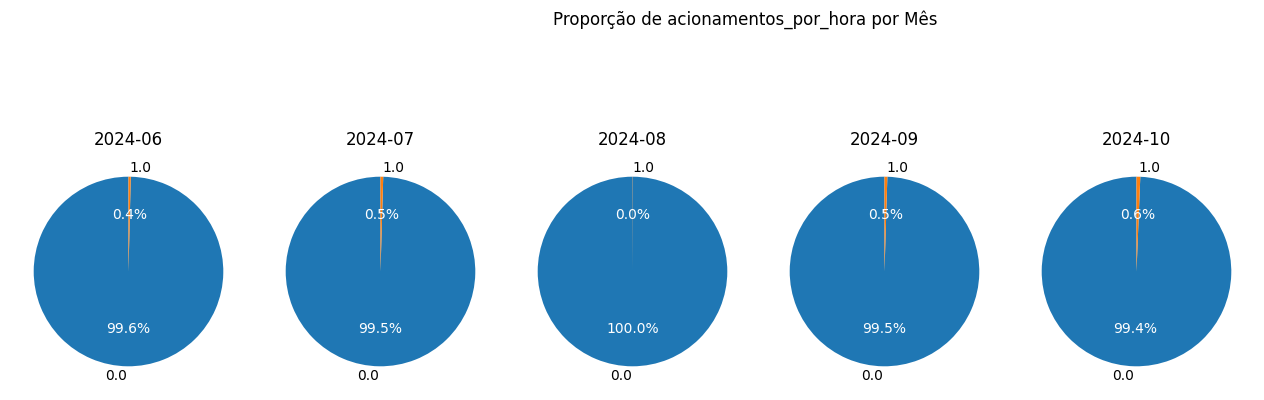

In [ ]:
meses = df['mes'].unique()


for coluna in df.columns:
    if df[coluna].nunique() == 2:

        fig, axes = plt.subplots(nrows=1, ncols=len(meses), figsize=(15, 5), sharey=True)
        fig.suptitle(f'Proporção de {coluna} por Mês')


        for i, mes in enumerate(meses):
            dados_agrupados = df[df['mes'] == mes][coluna].value_counts(normalize=True, dropna=False)
            wedges, texts, autotexts = axes[i].pie(
                dados_agrupados,
                autopct='%1.1f%%',
                startangle=90,
                labels=dados_agrupados.index
            )
            axes[i].set_title(mes)


            for text in autotexts:
                text.set_color('white')
                text.set_fontsize(10)

        plt.tight_layout(rect=[0, 0.03, 0.85, 0.95])
        plt.show()
